
# Minitarea 3


-----------------

Nombre: Miguel Videla

Fecha de Entrega: Martes 9 de Junio


## Instrucciones

- El ejercicio consiste en:

    - Responder preguntas relativas a los contenidos vistos en los vídeos y slides de las clases. 
    
    - Entrenar Word2Vec y FastText sobre un pequeño corpus.
    
    - Evaluar los embeddings obtenidos en una tarea de clasificación.

- La minitarea es INDIVIDUAL.

- Está demás decir que no se admiten copias, ni de código, ni de respuestas escritas. 

- La entrega debe ser por u-cursos.

- Atrasos: se descontará un punto por día hábil de atraso tanto para las mini-tareas como para las competencias.

- En el horario de auxiliar se abrirán horarios de consulta en donde podrán preguntar acerca del ejercicio y en general, de todo el curso. 

- Cada sección tiene un punto base y se evalúa sobre 6 puntos.

- Al revisar, tu código será ejecutado. Verifica que tu entrega no tenga errores.


## Referencias   

Vídeos: 

- [Linear Models](https://youtu.be/zhBxDsNLZEA)
- [Neural Networks](https://youtu.be/oHZHA8h2xN0)
- [Word Embeddings](https://youtu.be/wtwUsJMC9CA)

## Preguntas Teóricas
Para estas preguntas no es necesario implementar código, pero pueden utilizar pseudo código.

### Parte 1: Modelos Lineales

Suponga que tiene un dataset de 10.000 documentos etiquetados por 4 categorías: política, deporte, negocios y otros. 

**Pregunta 1**: Diseñe un modelo lineal capaz de clasificar un documento según estas categorías donde el output sea un vector con una distribución de probabilidad con la pertenencia a cada clase. (3 puntos)

**Respuesta**: 

Sea $\mathcal{C}=\{(\vec{x}^{(i)},\vec{y}^{(i)})\}_{i=1}^{10000}$ el corpus de documentos con $\vec{x}^{(i)}\in\mathbb{R}^{1\times m}$ el vector de características escogido para el documento $i$ (Por ejemplo: n-gramas, contadores de palabras/caractéres significativos/más frecuentes de cada tema, BoW, embeddings, concatenación ponderada, etc.), e $\vec{y}^{(i)}\in \mathbb{R}^{1\times 4}$ el vector *one-hot* correspondiente a su etiqueta. Definimos el modelo lineal de clasificación como:

\begin{equation}
    \vec{\hat{y}}^{(i)}=\text{softmax}(\vec{x}^{(i)}\cdot W + \vec{b})
    \tag{1}
\end{equation}

con $W\in \mathbb{R}^{m \times 4}$ y $\vec{b}\in \mathbb{R}^{1\times 4}$ la matriz de parámetros y el vector de sesgos del modelo lineal, respectivamente, y $\text{softmax}(\vec{x}^{(i)})=e^{\vec{x}^{(i)}}/\sum_{j=1}^{|\vec{x}^{(i)}|} e^{\vec{x}_j^{(i)}}$, la extensión multidimensional de la función sigmoide $\sigma(\cdot)$, la cual satisface que $\text{softmax}(\vec{x}^{(i)})\in [0,1]$ y $\sum_j\text{softmax}(\vec{x}_j^{(i)})=1$, por tanto, el vector resultante $\vec{\hat{y}}_i$ puede ser interpretado como una distribución de probabilidad con la pertenencia a cada clase. De este modo, la clasificación de un vector de características $\vec{x}^{(i)}$ asociado al documento $i$ queda determinado por $\text{argmax}_j\vec{\hat{y}}_j^{(i)}$.

**Pregunta 2**: Explique el proceso de entrenamiento y evaluación del modelo. (3 puntos)

**Respuesta**: 

Sea $\mathcal{L}_\Theta(\hat{\vec{y}},\vec{y})$ una función de pérdida, la cual denota la discrepancia de la predicción $\hat{\vec{y}}$ con respecto a la etiqueta real $\vec{y}$ de los datos, el entrenamiento del modelo busca que los parámetros del modelo lineal $\Theta=\{W,\vec{b}\}$ que minimicen la pérdida, es decir, se debe resolver el problema de optimización $\text{argmin}_\Theta \mathcal{L}_\Theta(\hat{\vec{y}},\vec{y})$. Para ello, se utiliza el método de gradiente descendente, el cual actualiza los parámetros del modelo de acuerdo a la dirección opuesta al gradiente de la función de pérdida de manera iterativa: 

\begin{equation}
\Theta^{(t+1)} \leftarrow \Theta^{(t)} -\eta \cdot \nabla \mathcal{L}_\Theta(\hat{\vec{y}},\vec{y})
\tag{2}
\end{equation}

con $\eta$ la tasa de aprendizaje y $t$ la iteración del método. Se observa que el método de gradiente descendente asegura alcanzar el mínimo global si, y sólo si, el espacio de optimización es convexo, en caso contrario, sólo se alcanzarán mínimos locales. En la práctica se utiliza la técnica de gradiente descendente estocástico, la cual computa la actualización del gradiente descendente sobre *mini-batches* o particiones de tamaño $B$ del conjunto de datos $\mathcal{C}$, robusteciendo el entrenamiento frente a ruido en la actualización.

Comúnmente se utilza la función de pérdida *cross-entropy* para problemas de clasificación, la cual se define como:

\begin{equation}
\mathcal{L}_{\text{cross-entropy}}(\hat{\vec{y}},\vec{y})=-\sum_i \vec{y}^{(i)}\log{\vec{\hat{y}}^{(i)}}
\tag{3}
\end{equation}

Para validar el modelo, se suele particionar el conjunto de datos en 3 subparticiones $\mathcal{C}=\mathcal{C}_{train}\dot\cup \mathcal{C}_{validation}\dot\cup \mathcal{C}_{test}$, donde la subpartición $\mathcal{C}_{train}$ es utilizada para entrenar el modelo mediante el método de gradiente descendente estocástico anteriormente descrito, mientras que el conjunto $\mathcal{C}_{validation}$ es utilizado para verificar el desempeño del modelo frente a datos no vistos en entrenamiento con el fin de evitar el sobreajuste y para ajustar hiperparámetros del mismo, tales como la cantidad de óptima de iteraciones de entrenamiento o el valor de la tasa de aprendizaje $\eta$. Una vez encontrada la configuración parámetrica óptima en cuanto a capacidad de generalización, el modelo es operado sobre la tercera partición $\mathcal{C}_{test}$ para evaluar su desempeño final.

### Parte 2: Redes Neuronales

Supongamos que tenemos la siguiente red neuronal.

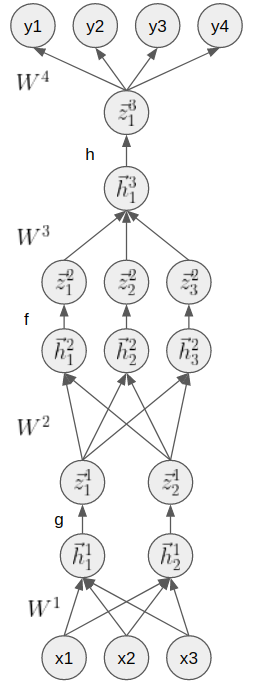

**Pregunta 1**: En clases les explicaron como se puede representar una red neuronal de una y dos capas de manera matemática. Dada la red neuronal anterior, represéntela matemáticamente, entregando las dimensiones de las matrices y vectores. (3 Puntos)

**Respuesta**: 

La salida de la red neuronal descrita queda expresada como:

\begin{equation}
\vec{\hat{y}} = NN_{MLP3}\big(\vec{x}\big) =h\big(f\big(g\big(x\cdot W^{1} + \vec{b}^1\big)\cdot W^2 + \vec{b}^2\big)\cdot W^3 + \vec{b}^3\big)\big)\cdot W^4 + \vec{b}^4
\tag{4}
\end{equation}

con $\vec{x}\in \mathbb{R}^{n\times 3}$, $W^1\in \mathbb{R}^{3\times 2}$, $W^2\in \mathbb{R}^{2\times 3}$, $W^3\in \mathbb{R}^{3\times 1}$, $W^4\in \mathbb{R}^{1\times 4}$, $\vec{b}^1\in \mathbb{R}^2$, $\vec{b}^2\in \mathbb{R}^3$, $\vec{b}^3\in \mathbb{R}^1$, $\vec{b}^4\in \mathbb{R}^4$ y $\vec{\hat{y}}\in \mathbb{R}^{n\times 4}$. Notar que para operar adecuadamente las matrices de pesos $W^{a\times b}$ con un vector de sesgo $\vec{b}\in \mathbb{R}^b$ mediante la suma ($+$), este último es replicado $a$-veces para obtener un vector de dimensión $\vec{b}\in \mathbb{R}^{a\times b}$, operación conocida como *broadcasting*.

**Pregunta 2**: Qué es backpropagation? Cuales serían los parámetros a evaluar en la red neuronal anterior? (1 punto)

**Respuesta**:

El método *backpropagtion* permite el cálculo de los gradientes de una función de costo $\mathcal{L}(\hat{\vec{y}},\vec{y})$ con respecto a cada parámetro del modelo de red neuronal de manera dinámica, utilizando el cómputo de los gradientes de la función de costo respecto a los parámetros más cercanos a la salida del modelo para el cálculo de los gradientes de la función de costo respecto a los parámetros anteriores sucesivamente por medio de la regla de la cadena de derivadas parciales, permitiendo propagar la pérdida "*hacia atrás*" en los parámetros del modelo, permitiendo la actualización de los mismos mediante algún método basado en gradiente, como por ejemplo, el método de gradiente descendente estocástico descrito en la sección anterior.

Los gradientes del modelo anterior a calcular para actualizar cada uno de los parámetros del modelo $w=\{W^4,\vec{b}^4,W^3,\vec{b}^3,W^2,\vec{b}^2,W^1,\vec{b}^1\}$ mediante algún método basado en gradiente son de la forma $\frac{\partial \mathcal{L}(\hat{\vec{y}},\vec{y})}{\partial w}$.



**Pregunta 3**: Explique los pasos de backpropagation. En la red neuronal anterior: Cuales son las derivadas que debemos calcular para poder obtener $\vec{\delta^l_{[j]}}$ en todas las capas? (2 puntos)

**Respuesta**:

<p>Los pasos del algoritmo <i>backpropagation</i> son los siguientes:</p>
<p>&nbsp; &nbsp; 1. Pasada "hacia a delante" o <i>forward-feed</i> de un conjunto de datos $\vec{x}\in \mathbb{R}^{n\times 3}$ por el modelo neuronal mediante la ecuación (4).</p>
<p>&nbsp; &nbsp; 2. Cálculo de gradientes "hacia a atrás" o <i>backward</i> $\frac{\partial \mathcal{L}(\hat{\vec{y}},\vec{y})}{\partial w}$ de parámetros del modelo $w=\{W^4,\vec{b}^4,W^3,\vec{b}^3,W^2,\vec{b}^2,W^1,\vec{b}^1\}$.</p>
<p>&nbsp; &nbsp; 3. Actualización de parámetros $w$ del modelo mediante método basado en gradiente, tal como el expresado en la ecuación (2).</p>

Sea $\vec{h}^l_{[j]}=\sum_i W^l_{[i,j]}\cdot z^{l-1}_{[i]}+\vec{b}^l_{[j]}$ la unidad $j$ obtenida de la transformación lineal realizada por la capa $l$ dada una entrada $z^{l-1}_{[j]}=g\big(\vec{h}^{l-1}_{[j]}\big)$ correspondiente a la aplicación de una función de activación $g$ sobre la transformación lineal de la capa precedente $l-1$, con $l=\{1,2,3,4\}$. Se define la variable $\vec{\delta}^l_{[j]}$ como el gradiente de la capa $l$:

\begin{equation}
\vec{\delta}^l_{[j]}:=\frac{\partial \mathcal{L}}{\partial \vec{h}^l}=\sum_k \Bigg(\frac{\partial \mathcal{L}}{\partial \vec{h}^{l+1}} \frac{\partial \vec{h}^{l+1}}{\partial \vec{h}^{l}} \Bigg)
\tag{5}
\end{equation}

Utilizando la regla de la cadena de derivadas parciales, y notando que $\frac{\partial\vec{h}_{[j]}^l}{\partial W_{[i,j]}^l}=\vec{z}_{i}^{l-1}$ la siguiente ecuación retro-propagada para el término $\vec{\delta}^l_{[j]}$:

\begin{equation}
\vec{\delta}^l_{[j]}:=\frac{\partial \mathcal{L}}{\partial \vec{h}^l}=g'\big(\vec{h}^l_{[j]}\big)\sum_k \vec{\delta}_{[k]}^{l+1}W_{[j,k]}^{l+1}
\tag{6}
\end{equation}

donde el término $\vec{\delta}^4_{[j]}=\frac{\partial \mathcal{L}}{\partial \vec{h}^4_{[j]}}=\frac{\partial \mathcal{L}}{\partial \hat{y}_{[j]}}$ corresponde al gradiente de la capa de salida trivial de calcular y $\vec{z}^0_{[j]}=\vec{x}_{[j]}$ corresponde a la entrada conocida. 

Finalmente, las derivadas de la función de costo en función de los parámetros del modelo se obtienen mediante la siguiente ecuación:

\begin{equation}
\frac{\partial \mathcal{L}(\hat{\vec{y}},\vec{y})}{\partial W^l_{[i,j]}}=\frac{\partial \mathcal{L}}{\partial \vec{h}^l}\frac{\partial\vec{h}_{[j]}^l}{\partial W_{[i,j]}^l}=\vec{\delta}^l_{[j]}\vec{z}^{l-1}_{[i]}
\tag{7}
\end{equation}

Por lo tanto, las derivadas a calcular son las mencionadas en las expresiones anteriores.

## Pregunta Práctica:

### Parte 3: Word Embeddings

En la auxiliar 2 aprendieron como entrenar Word2Vec utilizando gensim. El objetivo de esta parte es comparar los embeddings obtenidos con dos modelos diferentes: Word2Vec y [FastText](https://radimrehurek.com/gensim/models/fasttext.html) (utilizen size=200 en FastText) entrenados en el mismo dataset de diálogos de los Simpson. 

In [1]:
import re  
import pandas as pd 
from time import time  
from collections import defaultdict 
import string 
import multiprocessing
import os
import gensim
import sklearn
from sklearn import linear_model
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, classification_report
from sklearn.linear_model import LogisticRegression

# word2vec
from gensim.models import Word2Vec, KeyedVectors, FastText
from gensim.models.phrases import Phrases, Phraser
from sklearn.model_selection import train_test_split
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)

Utilizando el dataset adjunto con la tarea:

In [2]:
data_file = "dialogue-lines-of-the-simpsons.zip"
df = pd.read_csv(data_file)
stopwords = pd.read_csv(
    'https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt'
).values
stopwords = Counter(stopwords.flatten().tolist())
df = df.dropna().reset_index(drop=True) # Quitar filas vacias
print(df.shape)
df.head()

(131853, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


**Pregunta 1**: Ayudándose de los pasos vistos en la auxiliar, entrene los modelos Word2Vec y FastText sobre el dataset anterior. (4 puntos) (Hint, le puede servir explorar un poco los datos)

**Respuesta**:

In [3]:
# limpiar puntuaciones y separar por tokens.
punctuation = string.punctuation + "«»“”‘’…—"
def simple_tokenizer(doc, lower=False):
    if lower:
        tokenized_doc = doc.translate(str.maketrans(
            '', '', punctuation)).lower().split()

    tokenized_doc = doc.translate(str.maketrans('', '', punctuation)).split()

    tokenized_doc = [
        token for token in tokenized_doc if token.lower() not in stopwords
    ]
    return tokenized_doc

cleaned_content = [simple_tokenizer(doc) for doc in df.spoken_words]
phrases = Phrases(cleaned_content, min_count=100, progress_per=5000)
bigram = Phraser(phrases)
sentences = bigram[cleaned_content]
print(sentences[300])

2020-06-06 06:52:11,679 : INFO : collecting all words and their counts
2020-06-06 06:52:11,679 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-06-06 06:52:11,704 : INFO : PROGRESS: at sentence #5000, processed 16897 words and 17696 word types
2020-06-06 06:52:11,728 : INFO : PROGRESS: at sentence #10000, processed 33320 words and 32774 word types
2020-06-06 06:52:11,752 : INFO : PROGRESS: at sentence #15000, processed 49225 words and 46074 word types
2020-06-06 06:52:11,784 : INFO : PROGRESS: at sentence #20000, processed 67371 words and 61074 word types
2020-06-06 06:52:11,814 : INFO : PROGRESS: at sentence #25000, processed 85568 words and 75938 word types
2020-06-06 06:52:11,852 : INFO : PROGRESS: at sentence #30000, processed 104569 words and 91367 word types
2020-06-06 06:52:11,883 : INFO : PROGRESS: at sentence #35000, processed 122041 words and 104739 word types
2020-06-06 06:52:11,909 : INFO : PROGRESS: at sentence #40000, processed 138266 words and 1

['gallon', 'chocolate', 'brownie', 'fudge']


In [4]:
w2v_model = Word2Vec()
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=15)
w2v_model.init_sims(replace=True)

2020-06-06 06:52:14,564 : INFO : collecting all words and their counts
2020-06-06 06:52:14,565 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-06 06:52:14,686 : INFO : PROGRESS: at sentence #10000, processed 33138 words, keeping 10665 word types
2020-06-06 06:52:14,792 : INFO : PROGRESS: at sentence #20000, processed 66935 words, keeping 17139 word types
2020-06-06 06:52:14,905 : INFO : PROGRESS: at sentence #30000, processed 103943 words, keeping 23072 word types
2020-06-06 06:52:15,006 : INFO : PROGRESS: at sentence #40000, processed 137471 words, keeping 27257 word types
2020-06-06 06:52:15,108 : INFO : PROGRESS: at sentence #50000, processed 169305 words, keeping 31180 word types
2020-06-06 06:52:15,205 : INFO : PROGRESS: at sentence #60000, processed 199034 words, keeping 34584 word types
2020-06-06 06:52:15,311 : INFO : PROGRESS: at sentence #70000, processed 232290 words, keeping 38239 word types
2020-06-06 06:52:15,431 : INFO : PROGRESS: at se

2020-06-06 06:52:37,105 : INFO : EPOCH - 11 : training on 442276 raw words (358247 effective words) took 1.7s, 216115 effective words/s
2020-06-06 06:52:38,139 : INFO : EPOCH 12 - PROGRESS: at 56.90% examples, 197072 words/s, in_qsize 0, out_qsize 0
2020-06-06 06:52:38,865 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-06 06:52:38,869 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-06 06:52:38,878 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-06 06:52:38,879 : INFO : EPOCH - 12 : training on 442276 raw words (358086 effective words) took 1.8s, 202657 effective words/s
2020-06-06 06:52:39,923 : INFO : EPOCH 13 - PROGRESS: at 65.55% examples, 226426 words/s, in_qsize 0, out_qsize 0
2020-06-06 06:52:40,499 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-06 06:52:40,506 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-06 06:52:40,514 : INFO : worker threa

In [5]:
fastxt_model = FastText()
fastxt_model.build_vocab(sentences)
fastxt_model.train(sentences, total_examples=fastxt_model.corpus_count, epochs=15)
fastxt_model.init_sims(replace=True)

2020-06-06 06:52:43,884 : INFO : resetting layer weights
2020-06-06 06:52:47,686 : INFO : collecting all words and their counts
2020-06-06 06:52:47,686 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-06 06:52:47,801 : INFO : PROGRESS: at sentence #10000, processed 33138 words, keeping 10665 word types
2020-06-06 06:52:47,904 : INFO : PROGRESS: at sentence #20000, processed 66935 words, keeping 17139 word types
2020-06-06 06:52:48,013 : INFO : PROGRESS: at sentence #30000, processed 103943 words, keeping 23072 word types
2020-06-06 06:52:48,117 : INFO : PROGRESS: at sentence #40000, processed 137471 words, keeping 27257 word types
2020-06-06 06:52:48,217 : INFO : PROGRESS: at sentence #50000, processed 169305 words, keeping 31180 word types
2020-06-06 06:52:48,315 : INFO : PROGRESS: at sentence #60000, processed 199034 words, keeping 34584 word types
2020-06-06 06:52:48,418 : INFO : PROGRESS: at sentence #70000, processed 232290 words, keeping 38239 wo

2020-06-06 06:53:12,698 : INFO : EPOCH - 9 : training on 442276 raw words (358343 effective words) took 2.1s, 171763 effective words/s
2020-06-06 06:53:13,715 : INFO : EPOCH 10 - PROGRESS: at 43.12% examples, 152643 words/s, in_qsize 0, out_qsize 0
2020-06-06 06:53:14,749 : INFO : EPOCH 10 - PROGRESS: at 94.81% examples, 166319 words/s, in_qsize 0, out_qsize 0
2020-06-06 06:53:14,793 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-06 06:53:14,794 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-06 06:53:14,832 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-06 06:53:14,833 : INFO : EPOCH - 10 : training on 442276 raw words (358315 effective words) took 2.1s, 168389 effective words/s
2020-06-06 06:53:15,843 : INFO : EPOCH 11 - PROGRESS: at 43.12% examples, 153492 words/s, in_qsize 0, out_qsize 0
2020-06-06 06:53:16,877 : INFO : EPOCH 11 - PROGRESS: at 94.81% examples, 166827 words/s, in_qsize 0, out_qsize 0


**Pregunta 2**: Encuentre las palabras mas similares a las siguientes: Lisa, Bart, Homer, Marge. Cúal es la diferencia entre ambos resultados? Por qué ocurre esto? Intente comparar ahora Liisa en ambos modelos (doble i). Cuando escogería uno vs el otro? (2 puntos)

In [6]:
characters = ['Lisa', 'Bart', 'Homer', 'Marge']
print('Word2Vec Model')
for character in characters:
    print("'{}' most similar words:\n{}".format(character, [result[0] for result in w2v_model.wv.most_similar(positive=[character])]))
print('\nFastText Model')
for character in characters:
    print("'{}' most similar words:\n{}".format(character, [result[0] for result in fastxt_model.wv.most_similar(positive=[character])]))
print("\nModels comparisson under word 'Liisa'")
try:
    print("Word2Vec most similar words:\n{}".format([result[0] for result in w2v_model.wv.most_similar(positive=['Liisa'])]))
except:
    logger.error('Word {} not in Word2Vec dictionary'.format('Liisa'))
try:
    print("FastText most similar words:\n{}".format([result[0] for result in fastxt_model.wv.most_similar(positive=['Liisa'])]))
except:
    logger.error('Word {} not in FastText dictionary'.format('Liisa'))

2020-06-06 06:53:26,837 : ERROR : Word Liisa not in Word2Vec dictionary


Word2Vec Model
'Lisa' most similar words:
['Bart', 'teacher', 'Abraham', 'Abe', 'fourth', 'grade', 'Principal_Skinner', 'project', 'Bartholomew', 'Eliza']
'Bart' most similar words:
['Lisa', 'teacher', 'Abraham', 'Abe', 'brother', 'fourth', 'bully', 'teach', 'kindergarten', 'Principal_Skinner']
'Homer' most similar words:
['Apu', 'mate', 'honest', 'loser', 'workin', 'drunk', 'secrets', 'customers', 'fellas', 'beers']
'Marge' most similar words:
['husband', 'Abe', 'Apu', 'wife', 'marriage', 'Homer', 'swear', 'darling', 'sex', 'relationship']

FastText Model
'Lisa' most similar words:
['Lisas', 'Bart', 'Barto', 'Bartholomew', 'Lis', 'BartMan', 'Asa', 'Bartdude', 'Bartron', 'Barts']
'Bart' most similar words:
['Barto', 'Bartdude', 'BartMan', 'Lisa', 'Barts', 'Bartholomew', 'Lisas', 'Bartron', 'Lis', 'Baryshnikov']
'Homer' most similar words:
['Homey', 'Homers', 'customer', 'Homework', 'wife', 'Hoju', 'Howm', 'wifi', 'Knockahomer', 'exwife']
'Marge' most similar words:
['Marges', 'Maarge',

**Respuesta**:

Se aprecia que el modelo $\texttt{Word2Vec}$ retorna palabras relacionadas con el contexto semántico de las ocurrencias de las mismas de la serie *Los Simpsons*, debido a que el entrenamiento considera una vecindad  de palabras consecutivas de largo fijo para la predicción de una palabra (*Continuous Bag of Words*) o viceversa (*Skip-gram*), permitiendo la representación contextual de una palabra en el texto. De este modo, como ejemplo, se relaciona a *Lisa* con *Bart*, ya que son hermanos y comparten muchas escenas, relacionándo además a cada uno con sus respectivas actividades frecuentes (Ambos-escuela, *Lisa*-jazz, *Bart*-bully) y a *Marge* con palabras relacionadas a la vida marital, ya que dicho personaje representa el conservadurismo femenino cristiano.

En cambio, se aprecia que el modelo $\texttt{FastText}$ retorna palabras sintácticamente relacionadas, debido a que dicho modelo procesa las palabras particionandolas en *n*-gramas, tomando en cuentra la estructura interna de las palabras. De este modo, se relaciona a *Homer* con *Homey*, *Homers*, *Homeworks*, etc. y del mismo modo a *Marge* con *Marges*, *Maarge*, etc., apreciandose el enfoque en relacionar palabras sintácticamente similares, sin dejar de la similitud contextual de las palabras, donde por ejemplo, se sigue relacionando a *Bart* con *Lisa* y sus distintos derivados.

Al presentar una palabra nueva como *Liisa*, se aprecia que el modelo $\texttt{Word2Vec}$ es incapaz de procesarla debido a que esta no se encuentra en el diccionario de palabras sobre el cual el modelo fue entrenado, siendo una clara limitación del mismo, mientras que el modelo $\texttt{FastText}$ sí es capaz de procesarlo ya que, los *n*-gramas que componen dicha palabra desconocida si son reconocibles por el modelo, al ser entrenado con palabras similares como *Lisa* y sus derivados, retornando palabras muy similares a las obtenidas al utilizar la palabra *Lisa*.

Se concluye que ambos modelos difieren en la forma de representación de palabras, obteniendose *embeddings* de distinta naturaleza (semánticos a nivel de palabra para $\texttt{Word2Vec}$ y enfocados en la sintaxis a nivel de *n*-gramas de palabras para $\texttt{FastText}$), donde la elección del modelo dependerá del enfoque de la tarea a resolver. Si la tarea a resolver presenta muchas palabras derivadas de palabras presentes en entrenamiento, pero no idénticas,  se preferirá utilizar el modelo $\texttt{FastText}$ ya que el modelo $\texttt{Word2Vec}$ presenta la limitación de ser incapaz de procesar palabras distintas a su conjunto de entrenamiento.

### Parte 4: Aplicar embeddings para clasificar

Ahora utilizaremos estos embeddings para clasificar palabras basadas en su polaridad (positivas o negativas). Para esto ocuparemos el lexicón AFINN incluido en la tarea.

In [7]:
AFINN = 'AFINN_full.csv'
df_afinn = pd.read_csv(AFINN, sep='\t', header=None)
df_afinn.head()

,0,1
0,tops,1
1,groan,-1
2,perfects,1
3,spammer,-1
4,saluting,1


Hint: Para w2v son esperables KeyErrors, para eso pueden utilizar esta función auxiliar para filtrar las filas en el dataframe que no tienen embeddings (como w2v no tiene token UNK se deben ignorar), para luego aplicar los embeddings en toda la columna.

In [8]:
def try_apply(model,word):
    try:
        aux = model[word]
        return True
    except KeyError:
        #logger.error('Word {} not in dictionary'.format(word))
        return False

**Pregunta 1**: Una vez que tengan un dataframe del estilo [embedding, sentimiento] para ambos modelos, separarlo utilizando la siguiente función, donde X es su columna de embeddings e y es la columna de los valores. (3 puntos)

**Respuesta**:

In [9]:
w2v_emb = []; fastxt_emb = []
X_w2v = []; y_w2v = []
X_fastxt = []; y_fastxt = []
for i in range(len(df_afinn[0])):
    if try_apply(w2v_model, df_afinn[0][i]):
        X_w2v.append(w2v_model[df_afinn[0][i]])
        y_w2v.append(df_afinn[1][i])
    if try_apply(fastxt_model, df_afinn[0][i]):
        X_fastxt.append(fastxt_model[df_afinn[0][i]])
        y_fastxt.append(df_afinn[1][i])
print('Word2Vec number of embeddings: {}'.format(len(X_w2v)))
print('FastText number of embeddings: {}'.format(len(X_fastxt)))

/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Word2Vec number of embeddings: 1218
FastText number of embeddings: 3382


In [10]:
X_w2v_train, X_w2v_test, y_w2v_train, y_w2v_test = train_test_split(X_w2v, y_w2v, random_state=0, test_size=0.1, stratify=y_w2v)
X_fastxt_train, X_fastxt_test, y_fastxt_train, y_fastxt_test = train_test_split(X_fastxt, y_fastxt, random_state=0, test_size=0.1, stratify=y_fastxt)

**Pregunta 2**: Entrenar una regresión logística (vista en auxiliar) y reportar accuracy, precision, recall, f1 y confusion_matrix para ambos modelos. Por qué se obtienen estos resultados? Cómo los mejorarías? (3 puntos)

In [11]:
lr_w2v_clf = LogisticRegression()
lr_fastxt_clf = LogisticRegression()
lr_w2v_clf.fit(X_w2v_train, y_w2v_train)
lr_fastxt_clf.fit(X_fastxt_train, y_fastxt_train)
y_w2v_pred = lr_w2v_clf.predict(X_w2v_test)
y_fastxt_pred = lr_fastxt_clf.predict(X_fastxt_test)
print('Word2Vec Logistic Regression Performance:')
print('Confusion Matrix:')
print(confusion_matrix(y_w2v_test, y_w2v_pred))
print('Classification Report:')
print(classification_report(y_w2v_test, y_w2v_pred))
print('Accuracy: {}'.format(accuracy_score(y_w2v_test, y_w2v_pred)))
print('\nFastText Logistic Regression Performance:')
print('Confusion Matrix:')
print(confusion_matrix(y_fastxt_test, y_fastxt_pred))
print('Classification Report:')
print(classification_report(y_fastxt_test, y_fastxt_pred))
print('Accuracy: {}'.format(accuracy_score(y_fastxt_test, y_fastxt_pred)))

Word2Vec Logistic Regression Performance:
Confusion Matrix:
[[69  4]
 [40  9]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.95      0.76        73
           1       0.69      0.18      0.29        49

    accuracy                           0.64       122
   macro avg       0.66      0.56      0.52       122
weighted avg       0.66      0.64      0.57       122

Accuracy: 0.639344262295082

FastText Logistic Regression Performance:
Confusion Matrix:
[[214   7]
 [ 93  25]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.97      0.81       221
           1       0.78      0.21      0.33       118

    accuracy                           0.71       339
   macro avg       0.74      0.59      0.57       339
weighted avg       0.73      0.71      0.64       339

Accuracy: 0.7050147492625368


**Respuesta**:

Se aprecia que ambos modelos presentan un alto sesgo de predicción hacia la clase positiva, lo cual puede explicarse por el inherente sesgo del corpus de entrenamiento hacia palabras más negativas (con respecto al conjunto de prueba) debido a que *Los Simpsons* es una serie satírica de crítica social. Se aprecia además que el modelo $\texttt{FastText}$ presenta un desempeño superior al $\texttt{Word2Vec}$, lo cual puede explicarse por el superior sesgo presentado por el modelo $\texttt{Word2Vec}$ al corpus de entrenamiento de *Los Simpsons*, ya que las representaciones embebidas generadas dependen completamente de la relación contextual entre las palabras del mismo, mientas que el modelo $\texttt{FastText}$ resulta más robusto a dicho sesgo ya que es entrenado por medio de *n*-gramas de las palabras del corpus, los cuales resultan presentan una incidencia superior entre distintos corpus, generando representaciones de mayor generalidad que puedan enfrentar de mejor manera la tarea de clasificación sobre un corpus radicalmente distinto. El bajo desempeño de $\texttt{Word2Vec}$ se explica también por su incapacidad de procesar palabras no presentes en el conjunto de entrenamiento original, reduciéndo drásticamente la cantidad de datos (*embeddings*) disponibles para el entrenamiento del clasificador.

Los resultados podrían mejorarse entrenando los modelos sobre un corpus más rico y diverso, de mayor relación con el conjunto de prueba, además de seleccionar algoritmos de clasificación más sofisticados o incluso un ensamble de los mismos, en conjunto con una busqueda de hiperparámetros óptima (utilizando un conjunto de validación) para los mismos.

# Bonus: 2 puntos en cualquier pregunta

**Pregunta 1**: Replicar la parte anterior utilizando embeddings pre-entrenados en un dataset más grande y obtener mejores resultados. Les puede servir [ésta](https://radimrehurek.com/gensim/downloader.html#module-gensim.downloader) documentacion de gensim (1 punto).

**Respuesta**:

In [12]:
import gensim.downloader as api

dataset = api.load("text8")
w2v_model_2 = Word2Vec(dataset)
fastxt_model_2 = FastText(dataset)

2020-06-06 06:53:27,722 : INFO : collecting all words and their counts
2020-06-06 06:53:27,726 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-06 06:53:33,259 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2020-06-06 06:53:33,260 : INFO : Loading a fresh vocabulary
2020-06-06 06:53:33,439 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2020-06-06 06:53:33,439 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2020-06-06 06:53:33,662 : INFO : deleting the raw counts dictionary of 253854 items
2020-06-06 06:53:33,669 : INFO : sample=0.001 downsamples 38 most-common words
2020-06-06 06:53:33,669 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2020-06-06 06:53:33,917 : INFO : estimated required memory for 71290 words and 100 dimensions: 92677000 bytes
2020-06-06 06:53:33,917 : 

2020-06-06 06:54:38,852 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-06 06:54:38,860 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-06 06:54:38,861 : INFO : EPOCH - 4 : training on 17005207 raw words (12506238 effective words) took 13.6s, 917037 effective words/s
2020-06-06 06:54:39,864 : INFO : EPOCH 5 - PROGRESS: at 7.47% examples, 925529 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:54:40,865 : INFO : EPOCH 5 - PROGRESS: at 15.29% examples, 948677 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:54:41,866 : INFO : EPOCH 5 - PROGRESS: at 23.05% examples, 956795 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:54:42,873 : INFO : EPOCH 5 - PROGRESS: at 30.81% examples, 961296 words/s, in_qsize 6, out_qsize 0
2020-06-06 06:54:43,882 : INFO : EPOCH 5 - PROGRESS: at 38.68% examples, 965790 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:54:44,890 : INFO : EPOCH 5 - PROGRESS: at 46.44% examples, 965999 words/s, in_qsize 4, out_qsize 1
2

2020-06-06 06:56:14,565 : INFO : EPOCH 1 - PROGRESS: at 83.72% examples, 243579 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:56:15,569 : INFO : EPOCH 1 - PROGRESS: at 85.60% examples, 243350 words/s, in_qsize 6, out_qsize 0
2020-06-06 06:56:16,578 : INFO : EPOCH 1 - PROGRESS: at 87.60% examples, 243430 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:56:17,592 : INFO : EPOCH 1 - PROGRESS: at 89.48% examples, 243213 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:56:18,646 : INFO : EPOCH 1 - PROGRESS: at 91.48% examples, 243031 words/s, in_qsize 6, out_qsize 0
2020-06-06 06:56:19,666 : INFO : EPOCH 1 - PROGRESS: at 93.42% examples, 242887 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:56:20,696 : INFO : EPOCH 1 - PROGRESS: at 95.41% examples, 242882 words/s, in_qsize 4, out_qsize 1
2020-06-06 06:56:21,743 : INFO : EPOCH 1 - PROGRESS: at 97.53% examples, 243021 words/s, in_qsize 6, out_qsize 0
2020-06-06 06:56:22,743 : INFO : EPOCH 1 - PROGRESS: at 99.47% examples, 243022 words/s, in_qsiz

2020-06-06 06:57:22,872 : INFO : EPOCH 3 - PROGRESS: at 11.82% examples, 238704 words/s, in_qsize 4, out_qsize 2
2020-06-06 06:57:23,898 : INFO : EPOCH 3 - PROGRESS: at 13.82% examples, 239507 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:57:24,949 : INFO : EPOCH 3 - PROGRESS: at 15.87% examples, 239990 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:57:25,951 : INFO : EPOCH 3 - PROGRESS: at 17.81% examples, 240290 words/s, in_qsize 4, out_qsize 1
2020-06-06 06:57:26,954 : INFO : EPOCH 3 - PROGRESS: at 19.87% examples, 241780 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:57:27,965 : INFO : EPOCH 3 - PROGRESS: at 21.87% examples, 242374 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:57:28,968 : INFO : EPOCH 3 - PROGRESS: at 23.75% examples, 242088 words/s, in_qsize 6, out_qsize 0
2020-06-06 06:57:29,996 : INFO : EPOCH 3 - PROGRESS: at 25.63% examples, 241078 words/s, in_qsize 6, out_qsize 0
2020-06-06 06:57:31,010 : INFO : EPOCH 3 - PROGRESS: at 27.51% examples, 240606 words/s, in_qsiz

2020-06-06 06:58:34,089 : INFO : EPOCH 4 - PROGRESS: at 47.33% examples, 240673 words/s, in_qsize 6, out_qsize 0
2020-06-06 06:58:35,098 : INFO : EPOCH 4 - PROGRESS: at 49.27% examples, 240697 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:58:36,102 : INFO : EPOCH 4 - PROGRESS: at 51.15% examples, 240478 words/s, in_qsize 5, out_qsize 1
2020-06-06 06:58:37,128 : INFO : EPOCH 4 - PROGRESS: at 53.20% examples, 240904 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:58:38,167 : INFO : EPOCH 4 - PROGRESS: at 55.14% examples, 240722 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:58:39,198 : INFO : EPOCH 4 - PROGRESS: at 57.08% examples, 240552 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:58:40,211 : INFO : EPOCH 4 - PROGRESS: at 59.02% examples, 240548 words/s, in_qsize 4, out_qsize 2
2020-06-06 06:58:41,218 : INFO : EPOCH 4 - PROGRESS: at 61.02% examples, 240848 words/s, in_qsize 4, out_qsize 1
2020-06-06 06:58:42,227 : INFO : EPOCH 4 - PROGRESS: at 62.90% examples, 240602 words/s, in_qsiz

2020-06-06 06:59:45,639 : INFO : EPOCH 5 - PROGRESS: at 84.07% examples, 238738 words/s, in_qsize 5, out_qsize 1
2020-06-06 06:59:46,657 : INFO : EPOCH 5 - PROGRESS: at 86.01% examples, 238709 words/s, in_qsize 6, out_qsize 0
2020-06-06 06:59:47,687 : INFO : EPOCH 5 - PROGRESS: at 88.07% examples, 238929 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:59:48,733 : INFO : EPOCH 5 - PROGRESS: at 90.01% examples, 238844 words/s, in_qsize 5, out_qsize 1
2020-06-06 06:59:49,769 : INFO : EPOCH 5 - PROGRESS: at 91.95% examples, 238658 words/s, in_qsize 4, out_qsize 2
2020-06-06 06:59:50,804 : INFO : EPOCH 5 - PROGRESS: at 94.00% examples, 238832 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:59:51,824 : INFO : EPOCH 5 - PROGRESS: at 95.94% examples, 238833 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:59:52,828 : INFO : EPOCH 5 - PROGRESS: at 97.88% examples, 238805 words/s, in_qsize 5, out_qsize 0
2020-06-06 06:59:53,832 : INFO : EPOCH 5 - PROGRESS: at 99.65% examples, 238464 words/s, in_qsiz

In [13]:
w2v_emb = []; fastxt_emb = []
X_w2v = []; y_w2v = []
X_fastxt = []; y_fastxt = []
for i in range(len(df_afinn[0])):
    if try_apply(w2v_model_2, df_afinn[0][i]):
        X_w2v.append(w2v_model_2[df_afinn[0][i]])
        y_w2v.append(df_afinn[1][i])
    if try_apply(fastxt_model_2, df_afinn[0][i]):
        X_fastxt.append(fastxt_model_2[df_afinn[0][i]])
        y_fastxt.append(df_afinn[1][i])
print('Word2Vec number of embeddings: {}'.format(len(X_w2v)))
print('FastText number of embeddings: {}'.format(len(X_fastxt)))

/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Word2Vec number of embeddings: 2709
FastText number of embeddings: 3382


In [14]:
X_w2v_train, X_w2v_test, y_w2v_train, y_w2v_test = train_test_split(X_w2v, y_w2v, random_state=0, test_size=0.1, stratify=y_w2v)
X_fastxt_train, X_fastxt_test, y_fastxt_train, y_fastxt_test = train_test_split(X_fastxt, y_fastxt, random_state=0, test_size=0.1, stratify=y_fastxt)

In [15]:
lr_w2v_clf = LogisticRegression()
lr_fastxt_clf = LogisticRegression()
lr_w2v_clf.fit(X_w2v_train, y_w2v_train)
lr_fastxt_clf.fit(X_fastxt_train, y_fastxt_train)
y_w2v_pred = lr_w2v_clf.predict(X_w2v_test)
y_fastxt_pred = lr_fastxt_clf.predict(X_fastxt_test)
print('Word2Vec Logistic Regression Performance:')
print('Confusion Matrix:')
print(confusion_matrix(y_w2v_test, y_w2v_pred))
print('Classification Report:')
print(classification_report(y_w2v_test, y_w2v_pred))
print('Accuracy: {}'.format(accuracy_score(y_w2v_test, y_w2v_pred)))
print('\nFastText Logistic Regression Performance:')
print('Confusion Matrix:')
print(confusion_matrix(y_fastxt_test, y_fastxt_pred))
print('Classification Report:')
print(classification_report(y_fastxt_test, y_fastxt_pred))
print('Accuracy: {}'.format(accuracy_score(y_fastxt_test, y_fastxt_pred)))

Word2Vec Logistic Regression Performance:
Confusion Matrix:
[[157  15]
 [ 42  57]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.79      0.91      0.85       172
           1       0.79      0.58      0.67        99

    accuracy                           0.79       271
   macro avg       0.79      0.74      0.76       271
weighted avg       0.79      0.79      0.78       271

Accuracy: 0.7896678966789668

FastText Logistic Regression Performance:
Confusion Matrix:
[[197  24]
 [ 56  62]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.78      0.89      0.83       221
           1       0.72      0.53      0.61       118

    accuracy                           0.76       339
   macro avg       0.75      0.71      0.72       339
weighted avg       0.76      0.76      0.75       339

Accuracy: 0.7640117994100295


**Pregunta 2**: Utilizar wefe para ver si el modelo w2v entrenado con los dialogos de los Simpson tienen algun bias entre los personajes hombres y la cerveza (1 punto):

**Respuesta**:

In [16]:
from wefe.query import Query
from wefe.word_embedding_model import WordEmbeddingModel
from wefe.metrics import RND

model = WordEmbeddingModel(w2v_model.wv)
male_characters = ['Homer', 'Bart', 'Moe', 'Lenny', 'Carl', 'Barney', 'Apu']
female_characters = ['Marge', 'Lisa', 'Patty', 'Selma', 'Edna', 'Hoover', 'Manjula']

RND().run_query(
    Query([male_characters, female_characters], [['beer']], 
          ['Male Characters', 'Female Characters'], ['Beer']), model)

{'query_name': 'Male Characters and Female Characters wrt Beer',
 'result': -0.3511580228805542,
 'results_by_word': {'beer': -0.35115802}}

Como $RND<0$, se concluye que el término *cerveza* se encuentra sesgado a los **personajes masculinos** en el corpus de *Los Simpsons*.